**Unidad 1**


In [12]:
pip install requests

In [13]:
pip install beautifulsoup4


In [14]:
!pip install pytesseract

Ejercicio 2

In [15]:
import requests
from bs4 import BeautifulSoup
import lxml
from PIL import Image
import pytesseract
from urllib.parse import urljoin
from io import BytesIO
import urllib3
import urllib

In [43]:
import requests
from bs4 import BeautifulSoup

# URL de la página web
url = "https://bitacora.yvera.tur.ar/posts/2023-08-17-ods-turismo/"

# Realiza la solicitud GET a la página web desactivando la verificación del certificado SSL
response = requests.get(url, verify=False)

# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    # Parsea el contenido HTML de la página web
    soup = BeautifulSoup(response.text, 'html.parser')

    # Busca el tablero de indicadores de Objetivos de Desarrollo Sostenible (ODS)
    ods_tablero = soup.find("div", {"id": "ods"})

    # Verifica si se encontró el tablero de ODS
    if ods_tablero:
        # Extrae los nombres y valores de los indicadores de ODS
        indicadores = ods_tablero.find_all("div", class_="indicator-value")

        # Imprime los nombres y valores de los indicadores
        for indicador in indicadores:
            nombre = indicador.find("div", class_="indicator-title").text.strip()
            valor = indicador.find("div", class_="indicator-data").text.strip()
            print(f"{nombre}: {valor}")
    else:
        print("No se encontró el tablero de indicadores de Objetivos de Desarrollo Sostenible (ODS).")
else:
    print("No se pudo acceder a la página web.")


No se encontró el tablero de indicadores de Objetivos de Desarrollo Sostenible (ODS).


Ejercicio 7

In [25]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.0 MB/s eta 0:00:00


In [44]:
import PyPDF2

with open('/content/PROYECTO DE LEY TURISMO SOCIAL 2004.pdf', 'rb') as archivo:

    lector = PyPDF2.PdfReader(archivo)

    texto = ''

    for i in range(len(lector.pages)):
        pagina = lector.pages[i]

        # Extrae el texto de la página y lo añade a la cadena de texto
        texto += pagina.extract_text()


Eliminar stopwords

In [27]:
import PyPDF2
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar el conjunto de palabras de parada en español
nltk.download('stopwords')
nltk.download('punkt')

with open('/content/PROYECTO DE LEY TURISMO SOCIAL 2004.pdf', 'rb') as archivo:

    lector = PyPDF2.PdfReader(archivo)


    texto = ''

    # Itera sobre todas las páginas del PDF
    for i in range(len(lector.pages)):

        pagina = lector.pages[i]

        # Extrae el texto de la página y lo añade a la cadena de texto
        texto += pagina.extract_text()

# Definir las palabras de parada en español
stop_words = set(stopwords.words('spanish'))

# Función para eliminar las palabras de parada de una frase y tokenizar
def remove_stopwords_and_tokenize(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return " ".join(filtered_text)


texto_procesado = remove_stopwords_and_tokenize(texto)

df = pd.DataFrame({'texto_procesado': [texto_procesado]})


print(df)

print(df.to_string())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                     texto_procesado
0  Ley Nacional Turismo Social Título 1 Turismo S...
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Archivo loco.txt


In [45]:

with open('/content/loco.txt', 'r') as archivo:

    contenido = archivo.read()



In [29]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

# Tokenizamos el contenido del archivo en palabras
words_loco = word_tokenize(contenido)

# Creamos un objeto FreqDist para las palabras
fdist_words_loco = FreqDist(words_loco)

# Imprimimos las frecuencias
print('Frecuencia de palabras del archivo "loco.txt":', fdist_words_loco)


diccionario_frecuencias_loco = dict(fdist_words_loco)
print(diccionario_frecuencias_loco)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Frecuencia de palabras del archivo "loco.txt": <FreqDist with 10297 samples and 51168 outcomes>
{'SEIS': 1, 'MESESHACIÉNDOMEEL': 1, 'LOCO': 1, '!': 244, 'orsaiHERNÁNCASCIARIHACIÉNDOMESEIS': 1, 'MESESEL': 1, 'LOCO2021': 1, ',': 4852, 'Hernán': 3, 'Casciari': 3, 'casciari': 2, '@': 3, 'gmail.com': 1, 'Primera': 1, 'edición': 4, ':': 202, 'Junio': 1, '2021': 5, 'Editorial': 1, 'Orsai': 3, 'SRL': 1, 'EditorialOrsai': 1, 'Mariano': 1, 'Acha': 1, '2513': 1, '1430': 1, 'CABA': 1, 'Argentina': 2, 'editorialorsai.com': 1, 'Diseño': 1, 'de': 1434, 'la': 1068, 'colección': 6, 'Ilustración': 1, 'portada': 3, 'Alberto': 1, 'Montt': 1, 'Corrección': 1, 'J.': 2, 'Ignacio': 1, 'Merlo': 1, 'ISBN': 1, '978-84-15525-23-3': 1, 'Impreso': 1, 'en': 755, 'Esta': 12, 'obra': 7, 'se': 338, 'distribuye': 1, 'bajo': 11, 'una': 280, 'licencia': 1, 'Creative': 1, 'Commons': 1, 'Reconocimiento': 1, '3.0': 1, 'Umported': 1, '.': 2241, 'Es': 44, 'decir': 29, 'permite': 2, 'compartir': 2, 'copiar': 1, 'distribuir': 1,

In [ ]:
!pip install wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


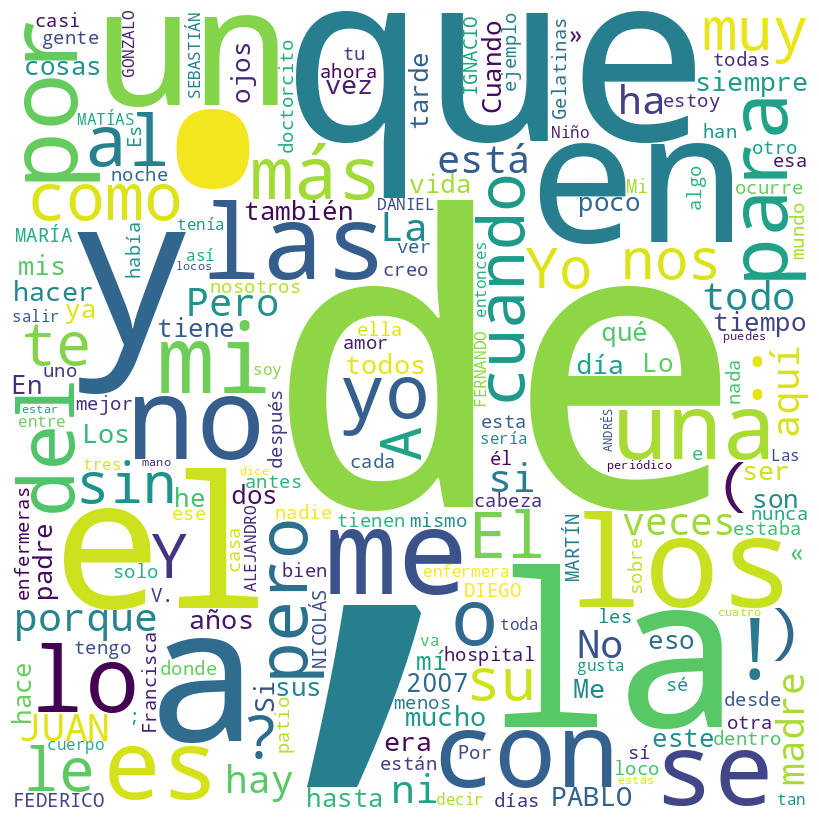

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

# Tokenizar el contenido en palabras
words = word_tokenize(contenido)

# Crear un objeto FreqDist para las palabras
fdist_words = FreqDist(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(fdist_words)

# Mostrar la imagen
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Archivo pkl

In [46]:
import pickle


ruta_archivo = "/content/125cuentos.pkl"


with open(ruta_archivo, "rb") as archivo:
    datos_importados = pickle.load(archivo)



N-Gramas

In [37]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Tokenizar el texto
tokens = word_tokenize(datos_importados)

# Generar los n-gramas
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

print("Bigramas:")
print(bigrams[:10])
print("\nTrigramas:")
print(trigrams[:10])

Bigramas:
[('125', 'CUENTOS'), ('CUENTOS', 'HERNÁN'), ('HERNÁN', 'CASCIARIUNA'), ('CASCIARIUNA', 'PLAYLIST'), ('PLAYLIST', 'DEorsa'), ('DEorsa', 'i125'), ('i125', 'CUENTOS'), ('CUENTOS', 'HERNÁN'), ('HERNÁN', 'CASCIARIUNA'), ('CASCIARIUNA', 'PLAYLIST')]

Trigramas:
[('125', 'CUENTOS', 'HERNÁN'), ('CUENTOS', 'HERNÁN', 'CASCIARIUNA'), ('HERNÁN', 'CASCIARIUNA', 'PLAYLIST'), ('CASCIARIUNA', 'PLAYLIST', 'DEorsa'), ('PLAYLIST', 'DEorsa', 'i125'), ('DEorsa', 'i125', 'CUENTOS'), ('i125', 'CUENTOS', 'HERNÁN'), ('CUENTOS', 'HERNÁN', 'CASCIARIUNA'), ('HERNÁN', 'CASCIARIUNA', 'PLAYLIST'), ('CASCIARIUNA', 'PLAYLIST', 'DE2022')]


Co-Ocurrencia

In [39]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle


nltk.download('punkt')

# Divide el texto en oraciones
sentences = nltk.sent_tokenize(datos_importados)

# Tokeniza el texto completo
tokens = nltk.word_tokenize(datos_importados)

# Crea un objeto CountVectorizer
vectorizer = CountVectorizer()

# Ajusta y transforma cada oración
X = vectorizer.fit_transform(sentences)

# Crea una matriz de co-ocurrencia
Xc = (X.T * X)

# Convierte la matriz de co-ocurrencia en un DataFrame de pandas
co_occurrences = pd.DataFrame(Xc.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

print(co_occurrences)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            10  100  100yo  101  101tres  102  10231  103  103el  104  ...  \
10           1    0      0    0        0    0      0    0      0    0  ...   
100          0    1      0    0        0    0      0    0      0    0  ...   
100yo        0    0      1    0        0    0      0    0      0    0  ...   
101          0    0      0    1        0    0      0    0      0    0  ...   
101tres      0    0      0    0        1    0      0    0      0    0  ...   
...         ..  ...    ...  ...      ...  ...    ...  ...    ...  ...  ...   
únicamente   0    0      0    0        0    0      0    0      0    0  ...   
únicas       0    0      0    0        0    0      0    0      0    0  ...   
único        0    0      0    0        0    0      0    0      0    0  ...   
útero        0    0      0    0        0    0      0    0      0    0  ...   
útil         0    0      0    0        0    0      0    0      0    0  ...   

            últimas  último  últimos  única  únicamen  únicamen

In [40]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.5/814.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.4/278.4 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [42]:
from langchain.text_splitter import RecursiveCharacterTextSplitter



text_splitter = RecursiveCharacterTextSplitter(chunk_size=80, chunk_overlap=10)
texts = text_splitter.split_text(datos_importados)

for txt in texts:

    print(f'{len(txt)}: {txt}')

Se han truncado las últimas 5000 líneas del flujo de salida.
59: contramos en el bar de la esquina en veinte minutos. Vos me
54: esperás ahí y charlamos. ¿Qué te parece?
Y él me dice:
60: —No vas a venir —me tutea.
Y le digo:
—¿A dónde no voy a ir?
54: —Al bar. Te voy a esperar una hora, dos horas, después
60: llega un guardia civil, me pide los documentos. Vos estás en
58: casa de tus suegros. Me mandaste a la policía por teléfono
59: porque pensás que estoy loco… Ya lo vivimos a esto, abuelo.
76: A mí se me pone la boca seca. Esa era exactamente mi 
idea, punto por punto.
59: Le digo:
—No, nada que ver. ¿Por qué pensás eso?
Y me dice:
55: —Porque es la segunda vez que vengo a verte, abuelo. La
57: primera me mandaste la policía. Yo te estaba esperando en
73: el bar. Ahora aprendí. Creéme.207—Estás loco, hermano —le digo—, no podés
16: no podés pedirme
60: que te crea.
—Mirá —me dice—, en un minuto, justo en un mi -
59: nuto, te va a llamar tu mujer al celular. Te va a pedir que
34: c